In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [4]:
df = pd.read_csv('df5.csv', index_col = [0])

In [5]:
df.shape

(33672, 9)

In [6]:
df.head()

,Target,Analogue,Index,t1,a1,a2,Label,target_smiles,analogue_smiles
2,DTXSID4020298,DTXSID1020431,[1 1],1,1.0,1.0,0,ClC1=CC=CC=C1,ClC1=CC=C(Cl)C=C1
3,DTXSID1020431,DTXSID4020298,[1 1],1,1.0,1.0,0,ClC1=CC=C(Cl)C=C1,ClC1=CC=CC=C1
4,DTXSID4020298,DTXSID6020430,[1 1],1,1.0,1.0,0,ClC1=CC=CC=C1,ClC1=C(Cl)C=CC=C1
5,DTXSID6020430,DTXSID4020298,[1 1],1,1.0,1.0,0,ClC1=C(Cl)C=CC=C1,ClC1=CC=CC=C1
6,DTXSID4020298,DTXSID6022056,[1 1],1,1.0,1.0,0,ClC1=CC=CC=C1,ClC1=CC(Cl)=CC=C1


In [7]:
new_df2 = pd.read_csv('new_df2.csv', index_col = [0])
new_df2

,DTXSID4020298,DTXSID1020431,DTXSID6020430,DTXSID6022056,DTXSID0021965,DTXSID8026193,DTXSID8026195,DTXSID1026089,DTXSID6026088,DTXSID7024320,...,DTXSID70169512,DTXSID30196445,DTXSID50212055,DTXSID90166240,DTXSID4039233,DTXSID60916875,DTXSID50864078,DTXSID20973686,DTXSID401015812,DTXSID501015053
DTXSID4020298,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
DTXSID1020431,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
DTXSID6020430,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
DTXSID6022056,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
DTXSID0021965,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID60916875,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
DTXSID50864078,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
DTXSID20973686,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
DTXSID401015812,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import numpy as np

In [9]:
def remove_upper_triangle(df):
    # Get the upper triangle mask
    mask = pd.DataFrame(np.triu(np.ones(df.shape), k=0), columns=df.columns, index=df.index)

    # Set upper triangle values to NaN
    df = df.where(mask == 0)

    return df

In [10]:
new_df3 = remove_upper_triangle(new_df2)

In [11]:
new_df3 =new_df3.unstack().reset_index().dropna()

In [12]:
new_df3.columns = ['Target', 'Analogue', 'Label']

In [13]:
target_smi = {k:v for k,v in zip(df['Target'], df['target_smiles'])}
analogue_smi = {k:v for k,v in zip(df['Analogue'], df['analogue_smiles'])}

In [14]:
new_df3['target_smi'] = new_df3['Target'].apply(lambda x: target_smi[x])

In [15]:
new_df3['target_mol'] = [Chem.MolFromSmiles(e) for e in new_df3['target_smi']]
new_df3['analogue_smi'] = new_df3['Analogue'].apply(lambda x: analogue_smi[x])

In [16]:
new_df3['target_FP'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in new_df3['target_mol']]

In [17]:
new_df3['analogue_mol'] = [Chem.MolFromSmiles(e) for e in new_df3['analogue_smi']]

In [18]:
new_df3['analogue_FP'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in new_df3['analogue_mol']]

In [24]:
new_df3['Label2'] = new_df3['Label'].apply(lambda x: 0 if x==1 else 1)

In [25]:
new_df3.Label2.value_counts()

Label2
1    15614
0     1222
Name: count, dtype: int64

In [26]:
new_df3.drop(['Label'], axis = 1, inplace = True)

In [27]:
new_df3.rename(columns = {'Label2':'Label'}, inplace = True)

In [28]:
new_df3.Label.value_counts()

Label
1    15614
0     1222
Name: count, dtype: int64

In [29]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

In [30]:
fpgen = AllChem.GetMorganGenerator(radius=3, fpSize=1024)

In [31]:
fpgen

In [32]:
new_df3['fps_target'] = new_df3['target_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [33]:
new_df3['fps_analogue'] = new_df3['analogue_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [34]:
#new_df3

In [35]:
mylst = []
for i, row in new_df3.iterrows():
    mylst.append(DataStructs.TanimotoSimilarity(row['fps_target'], row['fps_analogue']))

#DataStructs.TanimotoSimilarity(new_df3[['target_FP', 'analogue_FP']].iloc[0,:].values[0], new_df3[['target_FP', 'analogue_FP']].iloc[0,:].values[1])

In [36]:
len(mylst)

16836

In [37]:
new_df3['Tanimoto'] = mylst

<Axes: >

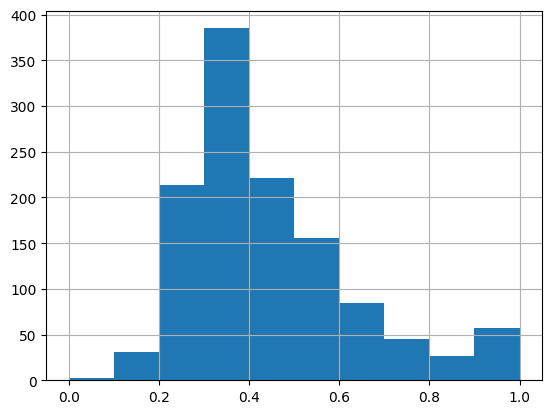

In [38]:
new_df3[new_df3['Label'] ==0]['Tanimoto'].hist()

<Axes: >

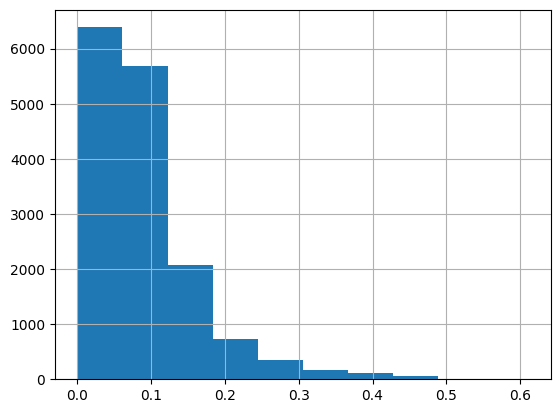

In [39]:
new_df3[new_df3['Label'] ==1]['Tanimoto'].hist()

In [40]:
from sklearn.model_selection import train_test_split
#from kennard_stone import train_test_split

from torch.utils.data import Dataset, DataLoader

In [41]:
X_train, X_test, y_train, y_test  = train_test_split(new_df3[['Target', 	'Analogue','target_smi', 'analogue_smi', 'Label']], new_df3['Label'], stratify = new_df3['Label'], random_state = 42,test_size=0.2)

In [42]:
y_train.value_counts(normalize = True)

Label
1    0.927383
0    0.072617
Name: proportion, dtype: float64

In [43]:
y_test.value_counts(normalize = True)

Label
1    0.927553
0    0.072447
Name: proportion, dtype: float64

In [44]:
X_train.columns

Index(['Target', 'Analogue', 'target_smi', 'analogue_smi', 'Label'], dtype='object')

In [45]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDistGeom as molDG
from rdkit.Chem import rdmolops

In [46]:
class Graph:
    def __init__(self, smiles: str,  node_vec_len: int, max_atoms: int = None):
        """
        Construct a molecular graph of a given molecule with a SMILES string.

        Build a node matrix that has dimensions (max_atoms,node_vec_len) and an
        adjacency matrix with dimensions (max_atoms,max_atoms).

        Parameters
        ----------
        molecule_smiles : str
            SMILES string of the molecule
        node_vec_len : int
            DESCRIPTION.
        max_atoms : int, optional
            DESCRIPTION. The default is None.
        """

        self.smiles = smiles
        
        self.node_vec_len = node_vec_len
        self.max_atoms = max_atoms
        self.smiles_to_mol()
        if self.mol is not None:
            self.smiles_to_graph()

    def smiles_to_mol(self):
        """
        Converts smiles string to Mol object in RDKit
        """

        # Use MolFromSmiles from RDKit to get molecule object
        mol = Chem.MolFromSmiles(self.smiles)
        if mol is None:
            self.mol = None
            return

        # Add hydrogens to molecule
        self.mol = Chem.AddHs(mol)

    def smiles_to_graph(self):
        """
        Converts smiles to a graph.
        """

        # Get list of atoms in molecule
        atoms = self.mol.GetAtoms()

        # Create empty node matrix
        if self.max_atoms is None:
            n_atoms = len(list(atoms))
        else:
            n_atoms = self.max_atoms
        node_mat = np.zeros((n_atoms, self.node_vec_len))

        # Iterate over atoms and add to node matrix
        for atom in atoms:
            # Get atom index and atomic number
            atom_index = atom.GetIdx()
            atom_no = atom.GetAtomicNum()

            # Assign to node matrix
            node_mat[atom_index, atom_no] = 1

        # Create empty adjacency matrix
        adj_mat = np.zeros((n_atoms, n_atoms))

        # Create adjacency matrix
        adj_mat = rdmolops.GetAdjacencyMatrix(self.mol)
        self.std_adj_mat = np.copy(adj_mat)

        # Create distance matrix
        dist_mat = molDG.GetMoleculeBoundsMatrix(self.mol)
        dist_mat[dist_mat == 0.0] = 1

        # Get modified adjacency matrix
        adj_mat = adj_mat * (1 / dist_mat)

        # Pad the adjacency matrix
        dim_add = n_atoms - adj_mat.shape[0]
        adj_mat = np.pad(
            adj_mat, pad_width=((0, dim_add), (0, dim_add)), mode="constant"
        )

        # Add an identity matrix to adjacency matrix
        # This will make an atom its own neighbor
        adj_mat = adj_mat + np.eye(n_atoms)

        # Save both matrices
        self.node_mat = node_mat
        self.adj_mat = adj_mat

In [47]:
class GraphData(Dataset):
    def __init__(self, df, node_vec_len: int, max_atoms: int):
        """
        GraphData class inheriting from the Dataset class in PyTorch.

        Parameters
        ----------
    
        node_vec_len : int
            Node vector length of molecular graphs
        max_atoms : int
            Maximum number of atoms in molecular graphs
        """
        self.df = df

        # Save attributes
        self.node_vec_len = node_vec_len
        self.max_atoms = max_atoms


        # Create lists
        #self.indices = df.index.to_list()
        #self.smiles = df["smiles"].to_list()
        #self.outputs = df["measured log solubility in mols per litre"].to_list()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        
        """
        Returns node matrix, adjacency matrix, output, and SMILES string of
        molecule.

        Parameters
        ----------
        i : int
            Dataset index

        Returns
        -------
        node_mat : torch.Tensor with dimension (max_atoms,node_vec_len)
            Node matrix
        adj_mat: torch.Tensor with dimension (max_atoms,max_atoms)
            Adjacency matrix
        output : torch.Tensor with dimension n_outputs
            Output vector
        smile : str
            SMILES string of molecule
        """
        
        row = self.df.iloc[idx]
        target_mol = Graph(row['target_smi'],self.node_vec_len, self.max_atoms)
        analogue_mol = Graph(row['analogue_smi'],self.node_vec_len, self.max_atoms)

        
        # Get matrices
        target_node_mat = torch.Tensor(target_mol.node_mat)
        target_adj_mat = torch.Tensor(target_mol.adj_mat)
        
        analogue_node_mat = torch.Tensor(analogue_mol.node_mat)
        analogue_adj_mat = torch.Tensor(analogue_mol.adj_mat)

        # Get output
        label = torch.tensor(row['Label']).float() 

        return (target_node_mat, target_adj_mat), (analogue_node_mat, analogue_adj_mat), label

   



In [48]:
def collate_graph_dataset(dataset: Dataset):
    # Create empty lists of node and adjacency matrices, outputs, and smiles
    target_node_mats = []
    target_adj_mats = []
    analogue_node_mats = []
    analogue_adj_mats = []
    labels = []
    
    
    # Iterate over list and assign each component to the correct list
    for i in range(len(dataset)):
        (target_node_mat,target_adj_mat),(analogue_node_mat,analogue_adj_mat), label  = dataset[i]
        target_node_mats.append(target_node_mat)
        target_adj_mats.append(target_adj_mat)
        analogue_node_mats.append(analogue_node_mat)
        analogue_adj_mats.append(analogue_adj_mat)
        labels.append(label)
        
    
        
    # Create tensors
    target_node_mats_tensor = torch.cat(target_node_mats, dim=0)
    target_adj_mats_tensor = torch.cat(target_adj_mats, dim=0)
    analogue_node_mats_tensor = torch.cat(analogue_node_mats, dim=0)
    analogue_adj_mats_tensor = torch.cat(analogue_adj_mats, dim=0)
    labels_tensor = torch.stack(labels, dim=0)
    
    # Return tensors
    return  (target_node_mats_tensor, target_adj_mats_tensor), (analogue_node_mats_tensor, analogue_adj_mats_tensor), labels_tensor, 

In [49]:
train_dataset = GraphData(X_train, max_atoms=200, 
                        node_vec_len=60)

In [86]:
train_dataset[0][2]

tensor(1.)

In [51]:
test_dataset = GraphData(X_test, max_atoms=200, 
                        node_vec_len=60)

In [83]:
from torch_geometric.data import Data

def adjacency_matrix_to_coo(node, adjacency_matrix, labels):
    # Get non-zero indices from the adjacency matrix
    row, col = torch.nonzero(adjacency_matrix, as_tuple=True)

    # Create COO representation
    edge_index = torch.stack([row, col], dim=0)

    # Create a PyTorch Geometric Data object
    data = Data(x=node, edge_index=edge_index, y = labels)

    return data

In [53]:
graph_data = adjacency_matrix_to_coo(train_dataset[0][0][0], train_dataset[0][0][1])

In [54]:
graph_data

Data(x=[200, 60], edge_index=[2, 236])

In [75]:
from torch_geometric.data import Data, Dataset

class CustomGraphDataset(Dataset):
    def __init__(self, graph_list):
        super(CustomGraphDataset, self).__init__()
        self.graph_list = graph_list

    def len(self):
        return len(self.graph_list)

    def get(self, idx):
        return self.graph_list[idx]


In [60]:
graph_lst = []

for i in range(len(train_dataset)):
    graph_lst.append(adjacency_matrix_to_coo(train_dataset[i][0][0], train_dataset[i][0][1]))

In [61]:
graph_lst[:10]

[Data(x=[200, 60], edge_index=[2, 236]),
 Data(x=[200, 60], edge_index=[2, 218]),
 Data(x=[200, 60], edge_index=[2, 276]),
 Data(x=[200, 60], edge_index=[2, 204]),
 Data(x=[200, 60], edge_index=[2, 286]),
 Data(x=[200, 60], edge_index=[2, 234]),
 Data(x=[200, 60], edge_index=[2, 224]),
 Data(x=[200, 60], edge_index=[2, 244]),
 Data(x=[200, 60], edge_index=[2, 278]),
 Data(x=[200, 60], edge_index=[2, 322])]

In [76]:
custom_dataset = CustomGraphDataset(graph_lst)

In [68]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt



In [69]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [142]:
from torch import nn
import torch.nn.functional as F

In [143]:
class ConvolutionLayer(nn.Module):
    def __init__(self, node_in_len: int, node_out_len: int):
        # Call constructor of base class
        super().__init__()

        # Create linear layer for node matrix
        self.conv_linear = nn.Linear(node_in_len, node_out_len)

        # Create activation function
        self.conv_activation = nn.LeakyReLU()

    def forward(self, node_mat, adj_mat):
        # Calculate number of neighbors
        n_neighbors = adj_mat.sum(dim=-1, keepdims=True)
        # Create identity tensor
        self.idx_mat = torch.eye(
            adj_mat.shape[-2], adj_mat.shape[-1], device=n_neighbors.device
        )
        # Add new (batch) dimension and expand
        idx_mat = self.idx_mat.unsqueeze(0).expand(*adj_mat.shape)
        # Get inverse degree matrix
        inv_degree_mat = torch.mul(idx_mat, 1 / n_neighbors)

        # Perform matrix multiplication: D^(-1)AN
        node_fea = torch.bmm(inv_degree_mat, adj_mat)
        node_fea = torch.bmm(node_fea, node_mat)

        # Perform linear transformation to node features 
        # (multiplication with W)
        node_fea = self.conv_linear(node_fea)

        # Apply activation
        node_fea = self.conv_activation(node_fea)

        return node_fea

In [144]:
class PoolingLayer(nn.Module):
    def __init__(self):
        # Call constructor of base class
        super().__init__()

    def forward(self, node_fea):
        # Pool the node matrix
        pooled_node_fea = node_fea.mean(dim=1)
        return pooled_node_fea

In [145]:
class ChemGCN(nn.Module):
    def __init__(
        self,
        node_vec_len: int,
        node_fea_len: int,
        hidden_fea_len: int,
        n_conv: int,
        n_hidden: int,
        n_outputs: int,
        p_dropout: float = 0.0,
    ):
        # Call constructor of base class
        super().__init__()

        # Define layers
        
        
        # Initial transformation from node matrix to node features
        self.init_transform = nn.Linear(node_vec_len, node_fea_len)

        # Convolution layers
        self.conv_layers = nn.ModuleList(
            [
                ConvolutionLayer(
                    node_in_len=node_fea_len,
                    node_out_len=node_fea_len,
                )
                for i in range(n_conv)
            ]
        )

        # Pool convolution outputs
        self.pooling = PoolingLayer()
        pooled_node_fea_len = node_fea_len

        # Pooling activation
        self.pooling_activation = nn.LeakyReLU()

        # From pooled vector to hidden layers
        self.pooled_to_hidden = nn.Linear(pooled_node_fea_len, hidden_fea_len)

        # Hidden layer
        self.hidden_layer = nn.Linear(hidden_fea_len, hidden_fea_len)

        # Hidden layer activation function
        self.hidden_activation = nn.LeakyReLU()

        # Hidden layer dropout
        self.dropout = nn.Dropout(p=p_dropout)

        # If hidden layers more than 1, add more hidden layers
        self.n_hidden = n_hidden
        if self.n_hidden > 1:
            self.hidden_layers = nn.ModuleList(
                [self.hidden_layer for _ in range(n_hidden - 1)]
            )
            self.hidden_activation_layers = nn.ModuleList(
                [self.hidden_activation for _ in range(n_hidden - 1)]
            )
            self.hidden_dropout_layers = nn.ModuleList(
                [self.dropout for _ in range(n_hidden - 1)]
            )

        # Final layer going to the output
        self.hidden_to_output = nn.Linear(hidden_fea_len, n_outputs)

    def forward_once(self, node_mat, adj_mat):
        # Perform initial transform on node_mat
        node_fea = self.init_transform(node_mat)

        # Perform convolutions
        for conv in self.conv_layers:
            node_fea = conv(node_fea, adj_mat)

        # Perform pooling
        pooled_node_fea = self.pooling(node_fea)
        pooled_node_fea = self.pooling_activation(pooled_node_fea)

        # First hidden layer
        hidden_node_fea = self.pooled_to_hidden(pooled_node_fea)
        hidden_node_fea = self.hidden_activation(hidden_node_fea)
        hidden_node_fea = self.dropout(hidden_node_fea)

        # Subsequent hidden layers
        if self.n_hidden > 1:
            for i in range(self.n_hidden - 1):
                hidden_node_fea = self.hidden_layers[i](hidden_node_fea)
                hidden_node_fea = self.hidden_activation_layers[i](hidden_node_fea)
                hidden_node_fea = self.hidden_dropout_layers[i](hidden_node_fea)

        # Output
        out = self.hidden_to_output(hidden_node_fea)

        return out
    
    def forward(self, node_mat1, adj_mat1, node_mat2, adj_mat2):
       
        output1 = self.forward_once(node_mat1, adj_mat1)
        output2 = self.forward_once(node_mat2, adj_mat2)

        return output1, output2

In [146]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Euclidean distance between the embeddings
        euclidean_distance = F.pairwise_distance(output1, output2)

        # Contrastive loss formula
        contrastive_loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

        return contrastive_loss

In [147]:
max_atoms = 200
node_vec_len = 60
hidden_nodes = 60
n_conv_layers = 4
n_hidden_layers = 2
n_epochs = 10

In [148]:
model = ChemGCN(
    node_vec_len=node_vec_len,
    node_fea_len=hidden_nodes,
    hidden_fea_len=hidden_nodes,
    n_conv=n_conv_layers,
    n_hidden=n_hidden_layers,
    n_outputs=1,
    p_dropout=0.1,
)

In [149]:
criterion = ContrastiveLoss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.005)

In [150]:
#model

In [151]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    
    collate_fn=collate_graph_dataset,
)

In [152]:
test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    
    collate_fn=collate_graph_dataset,
)

In [153]:
2024-1996

28

In [154]:
def show_plot(counter,loss_history):
    f, ax = plt.subplots()
    return ax.plot(counter,loss_history)

In [155]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score,f1_score

In [156]:
def train_network(model, train_loader, optimizer, criterion, n_epochs=50):
    model.train()
    avg_loss = 0
    counter = []
    loss_history = [] 
    count = 0
    
        #total_loss = 0.0
    for i, data in enumerate(train_loader):
            # Unpack data
            a,b,c = data
            node_mat1 = a[0]
            adj_mat1 = a[1]
            node_mat2 = b[0]
            adj_mat2 = b[1]
            label = c
            
            # Reshape inputs
            first_dim = int((torch.numel(node_mat1)) / (max_atoms * node_vec_len))
            node_mat1 = node_mat1.reshape(first_dim, max_atoms, node_vec_len)
            adj_mat1 = adj_mat1.reshape(first_dim, max_atoms, max_atoms)
            
            first_dim1 = int((torch.numel(node_mat2)) / (max_atoms * node_vec_len))
            node_mat2 = node_mat2.reshape(first_dim1, max_atoms, node_vec_len)
            adj_mat2 = adj_mat2.reshape(first_dim1, max_atoms, max_atoms)
            
            
            output1, output2 = model(node_mat1, adj_mat1, node_mat2, adj_mat2)
            loss = criterion(output1, output2, label)
            avg_loss += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #total_loss += loss.item()
            # Every 10 batches print out the loss
            count += 1
            avg_loss = avg_loss / count
            counter.append(count)
            loss_history.append(loss.item())
        
            # Print stats
            print(
                "Epoch: [{0}]\tTraining Loss: [{1:.2f}]"\
                   .format(
                            count, avg_loss
                   )
            )
            
    return  avg_loss, count, loss, counter, loss_history   

In [157]:
result = train_network(model, train_loader, optimizer, criterion, n_epochs =10)

Epoch: [1]	Training Loss: [1.60]
Epoch: [2]	Training Loss: [1.79]
Epoch: [3]	Training Loss: [1.33]
Epoch: [4]	Training Loss: [0.86]
Epoch: [5]	Training Loss: [0.52]
Epoch: [6]	Training Loss: [0.37]
Epoch: [7]	Training Loss: [0.34]
Epoch: [8]	Training Loss: [0.32]
Epoch: [9]	Training Loss: [0.27]
Epoch: [10]	Training Loss: [0.23]
Epoch: [11]	Training Loss: [0.24]


In [158]:
#result[4]

In [159]:
def show_plot(x,y):
    f, ax = plt.subplots()
    return ax.plot(x, y)
     

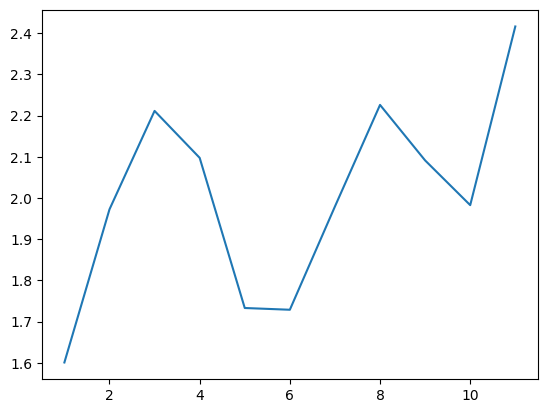

In [160]:
show_plot(result[3],result[4])

In [161]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score,f1_score

In [162]:
def test_network(model, test_loader, threshold = 0.7):
    model.eval()
    true_labels = []
    predicted_labels = []
    
    with torch.no_grad():
         for i, data in enumerate(test_loader):
            # Unpack data
            a,b,c = data
            node_mat1 = a[0]
            adj_mat1 = a[1]
            node_mat2 = b[0]
            adj_mat2 = b[1]
            label = c
            
            # Reshape inputs
            first_dim = int((torch.numel(node_mat1)) / (max_atoms * node_vec_len))
            node_mat1 = node_mat1.reshape(first_dim, max_atoms, node_vec_len)
            adj_mat1 = adj_mat1.reshape(first_dim, max_atoms, max_atoms)
            
            first_dim1 = int((torch.numel(node_mat2)) / (max_atoms * node_vec_len))
            node_mat2 = node_mat2.reshape(first_dim1, max_atoms, node_vec_len)
            adj_mat2 = adj_mat2.reshape(first_dim1, max_atoms, max_atoms)
            
            
            output1, output2 = model(node_mat1, adj_mat1, node_mat2, adj_mat2)
            loss = criterion(output1, output2, label)
            euclidean_distance = F.pairwise_distance(output1, output2)
            
            predictions = (euclidean_distance < threshold).float()

            true_labels.extend(label.cpu().numpy())
            predicted_labels.extend(predictions.cpu().numpy())
        
    return true_labels, predicted_labels

In [163]:
train_predictions = test_network(model, train_loader, threshold = 0.7)

In [168]:
test_predictions = test_network(model, test_loader, threshold = 0.7)

In [164]:
len(train_predictions[0])

343

In [169]:
len(test_predictions[0])

86

In [167]:
balanced_accuracy_score(train_predictions[0], train_predictions[1] )

0.5

In [171]:
accuracy_score(test_predictions[0], test_predictions[1] )

0.5